# Transfer Learning with MobileNetV2

## Model Summary:
- **Architecture:** MobileNetV2 (Pre-trained on ImageNet, `include_top=False`)
- **Input Shape:** 224 × 224 × 3 RGB images
- **Top Layers Added:**
  - Global Average Pooling
  - Dropout (0.2)
  - Dense Layer with 8 output units (softmax activation)
- **Base Model:** Frozen (non-trainable during initial training)

##  Training Hyperparameters:
- **Optimizer:** Adam
- **Loss Function:** Sparse Categorical Crossentropy
- **Metrics:** Accuracy
- **Epochs:** 30
- **Batch Size:** Default (as per `image_dataset_from_directory`)
- **Data Augmentation:**  *Not Applied*

##  Training Results:
- Trained on **794 images** (8 classes)
- Validation on **198 images**
- Plotted **Training vs Validation Accuracy** and **Loss Curves**
- Observed stable learning with gradual accuracy improvement

##  Saved Model:
- Model saved as: **`mobilenetv2_plant_disease.keras`**
- Used for evaluation and comparison with other transfer learning models


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers
from data_loader import load_dataset

# Load data
train_ds, val_ds = load_dataset('./plantdisease_subset')

#  Create MobileNetV2 Model with 8 Classes
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
base_model.trainable = False

inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(8, activation='softmax')(x)  #  Changed to 8
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

#  Save Model
model.save('mobilenetv2_plant_disease.keras')


Found 992 files belonging to 8 classes.
Using 794 files for training.
Found 992 files belonging to 8 classes.
Using 198 files for validation.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.2010 - loss: 2.1651 - val_accuracy: 0.4091 - val_loss: 1.6924
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4063 - loss: 1.6715 - val_accuracy: 0.5707 - val_loss: 1.3026
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5082 - loss: 1.4055 - val_accuracy: 0.6414 - val_loss: 1.1403
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5772 - loss: 1.1727 - val_accuracy: 0.6768 - val_loss: 1.0326
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6866 - loss: 1.0138 - val_accuracy: 0.7121 - val_loss: 0.9623
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6726 - loss: 0.9622 - val_accuracy: 0.7273 - val_loss: 0.9126
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - a

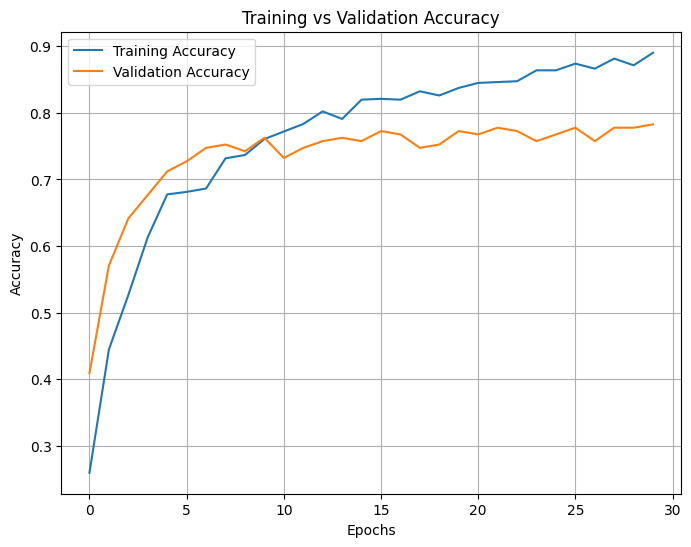

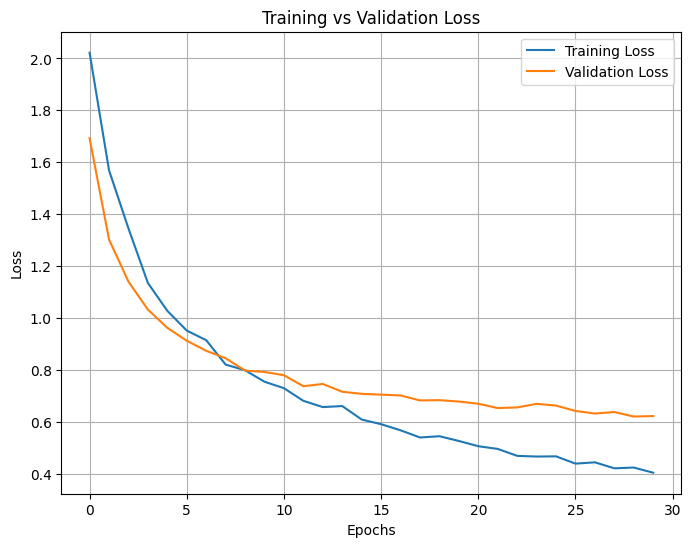

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Found 992 files belonging to 8 classes.
Using 794 files for training.
Found 992 files belonging to 8 classes.
Using 198 files for validation.


<Figure size 1000x800 with 0 Axes>

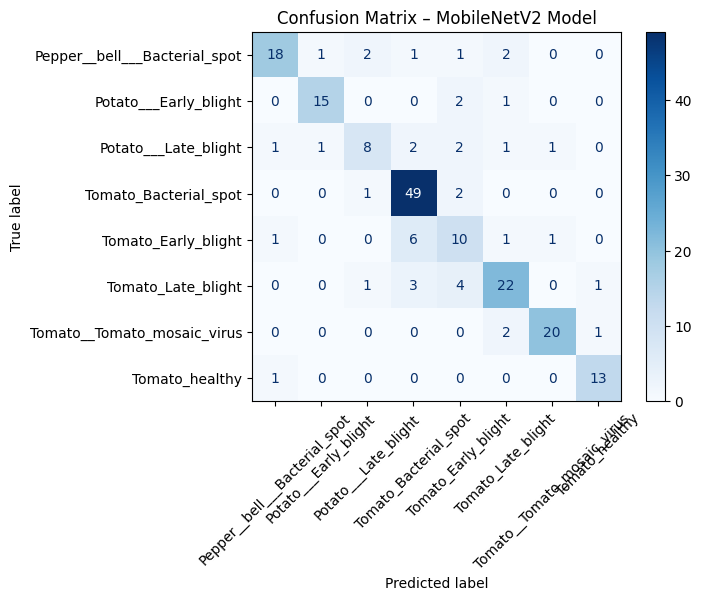


Classification Report – MobileNetV2 Model:

                               precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.86      0.72      0.78        25
        Potato___Early_blight       0.88      0.83      0.86        18
         Potato___Late_blight       0.67      0.50      0.57        16
        Tomato_Bacterial_spot       0.80      0.94      0.87        52
          Tomato_Early_blight       0.48      0.53      0.50        19
           Tomato_Late_blight       0.76      0.71      0.73        31
  Tomato__Tomato_mosaic_virus       0.91      0.87      0.89        23
               Tomato_healthy       0.87      0.93      0.90        14

                     accuracy                           0.78       198
                    macro avg       0.78      0.75      0.76       198
                 weighted avg       0.78      0.78      0.78       198



In [ ]:

model = tf.keras.models.load_model('mobilenetv2_plant_disease.keras')


_, val_ds = load_dataset('./plantdisease_subset')


class_names = val_ds.class_names


y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    preds_class = np.argmax(preds, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(preds_class)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix – MobileNetV2 Model")
plt.show()

print("\nClassification Report – MobileNetV2 Model:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

##  MobileNetV2 Model Evaluation – Confusion Matrix & Classification Report

###  Confusion Matrix Observations:
- **Best performing classes:**
  - **Tomato_Bacterial_spot** — 49/52 correct
  - **Tomato__Tomato_mosaic_virus** — 20/23 correct
  - **Tomato_healthy** — 13/14 correct
- **Moderate confusion in:**
  - **Potato___Late_blight** — noticeable misclassifications across several classes
  - **Tomato_Early_blight** — significant confusion with Tomato_Late_blight and Tomato_Bacterial_spot
  - **Pepper__bell___Bacterial_spot** — a few false positives

---

###  Classification Report Highlights:
| Class | Precision | Recall | F1-Score |
|---|---|---|---|
| Pepper__bell___Bacterial_spot | 0.86 | 0.72 | 0.78 |
| Potato___Early_blight | 0.88 | 0.83 | 0.86 |
| Potato___Late_blight | 0.67 | 0.50 | 0.57 |
| Tomato_Bacterial_spot | 0.80 | 0.94 | 0.87 |
| Tomato_Early_blight | 0.48 | 0.53 | 0.50 |
| Tomato_Late_blight | 0.76 | 0.71 | 0.73 |
| Tomato__Tomato_mosaic_virus | 0.91 | 0.87 | 0.89 |
| Tomato_healthy | 0.87 | 0.93 | 0.90 |

- **Overall Accuracy:** **78%**
- **Macro Average F1-Score:** **0.76**
- **Weighted Average F1-Score:** **0.78**

---

### Conclusion:
- MobileNetV2 showed acceptable performance but underperformed compared to EfficientNetB0 and ResNet50.
- Struggled with classes that have similar visual features (especially blight classes).
- Suitable for lightweight models but may require fine-tuning or augmentation for better results.
